Q2) American options with Binomial (50 pts)
<br> Assuming the continuously compounded interest rates and dividends yields are piecewise constant, and the volatility is constant, write an option pricing routine for American call and put options assuming:
<br> Current stock price = 100
<br> r = 4.25%
<br> q = 1.5%
<br> sigma = 25%
<br> T = 1 year
<br> Have the strike ranges from 20 to 200.
<br> Compare with the price of European options.
<br> Plot the results for various sets of parameters

Initial Steps/Assumptions:
<br> 1) We take strike ranges from 20 to 200 with steps of 10
<br> 2) We discretize the number of steps to be 100 for building the American Option Binomial Tree 
<br> 3) As instructed, comparison for the first part of the question has been done with the help of a plot and plots for different sets of parameters (volatilities, maturities, risk-free rates and dividend yields) have also been represented appropriately

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

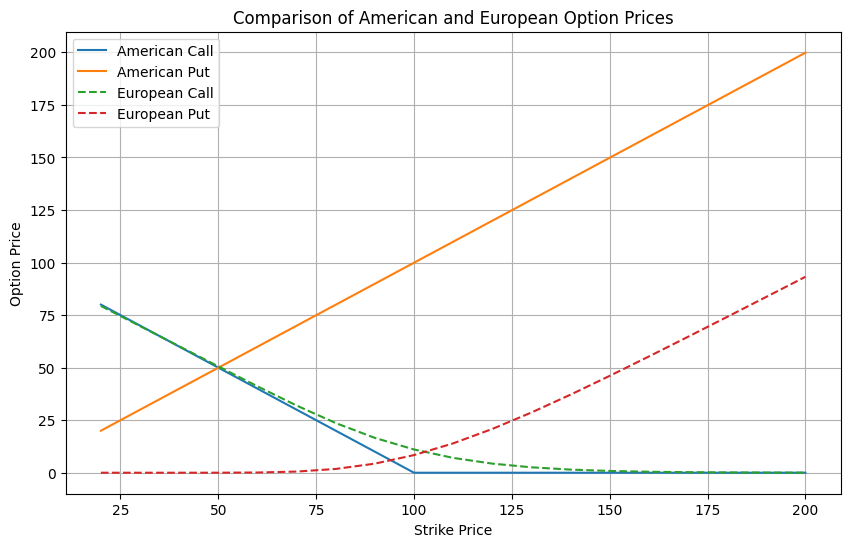

In [4]:
def european_option_price(S, K, r, q, sigma, T, option_type='call'): # Black-Scholes Model Formula
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        option_price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return option_price

def binomial_tree_american_option(S, K, r, q, sigma, T, N, option_type='call'):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp((r - q) * dt) - d) / (u - d)
    
    # Generate stock price tree
    stock_tree = np.zeros((N+1, N+1)) #2D Array where each row of the array represents a specific point in time and each column represents a possible
    # price level of the stock at that time.
    stock_tree[0, 0] = S #Store initial stock price as first element of first row
    for i in range(1, N+1):
        stock_tree[i, 0] = stock_tree[i-1, 0] * u #Initialize the topmost value of a particular point in time
        for j in range(1, i+1): #Populate columns of a specific point in time
            stock_tree[i, j] = stock_tree[i-1, j-1] * d
            
    # Generate option value tree through backward propagation after building the binomial tree
    option_tree = np.zeros((N+1, N+1)) # 2D Array to represent option values at each point in time
    if option_type == 'call':
        option_tree[:, N] = np.maximum(0, stock_tree[:, N] - K) #Start with the expiration time
    elif option_type == 'put':
        option_tree[:, N] = np.maximum(0, K - stock_tree[:, N]) #Start with the expiration time
        
    # Calculate option values at each node
    for j in range(N-1, -1, -1): #Backward Propagation
        for i in range(j+1):
            if option_type == 'call': #Probabilistic price deduction and american option decision-making step for every node
                option_tree[i, j] = max(stock_tree[i, j] - K,
                                        np.exp(-r * dt) * (p * option_tree[i, j+1] + (1 - p) * option_tree[i+1, j+1]))
            elif option_type == 'put':
                option_tree[i, j] = max(K - stock_tree[i, j],
                                        np.exp(-r * dt) * (p * option_tree[i, j+1] + (1 - p) * option_tree[i+1, j+1]))
    
    return option_tree[0, 0]

# Parameters
S = 100  # Current stock price
r = 0.0425  # Risk-free interest rate
q = 0.015  # Dividend yield
sigma = 0.25  # Volatility
T = 1  # Time to maturity
N = 100  # Number of time steps
strike_range = np.arange(20, 201, 10)  # Strike range

# Calculate option prices
american_call_prices = [binomial_tree_american_option(S, K, r, q, sigma, T, N, 'call') for K in strike_range]
american_put_prices = [binomial_tree_american_option(S, K, r, q, sigma, T, N, 'put') for K in strike_range]

# European option prices
european_call_prices = [european_option_price(S, K, r, q, sigma, T, 'call') for K in strike_range]
european_put_prices = [european_option_price(S, K, r, q, sigma, T, 'put') for K in strike_range]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(strike_range, american_call_prices, label='American Call')
plt.plot(strike_range, american_put_prices, label='American Put')
plt.plot(strike_range, european_call_prices, linestyle='--', label='European Call')
plt.plot(strike_range, european_put_prices, linestyle='--', label='European Put')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Comparison of American and European Option Prices')
plt.legend()
plt.grid(True)
plt.show()

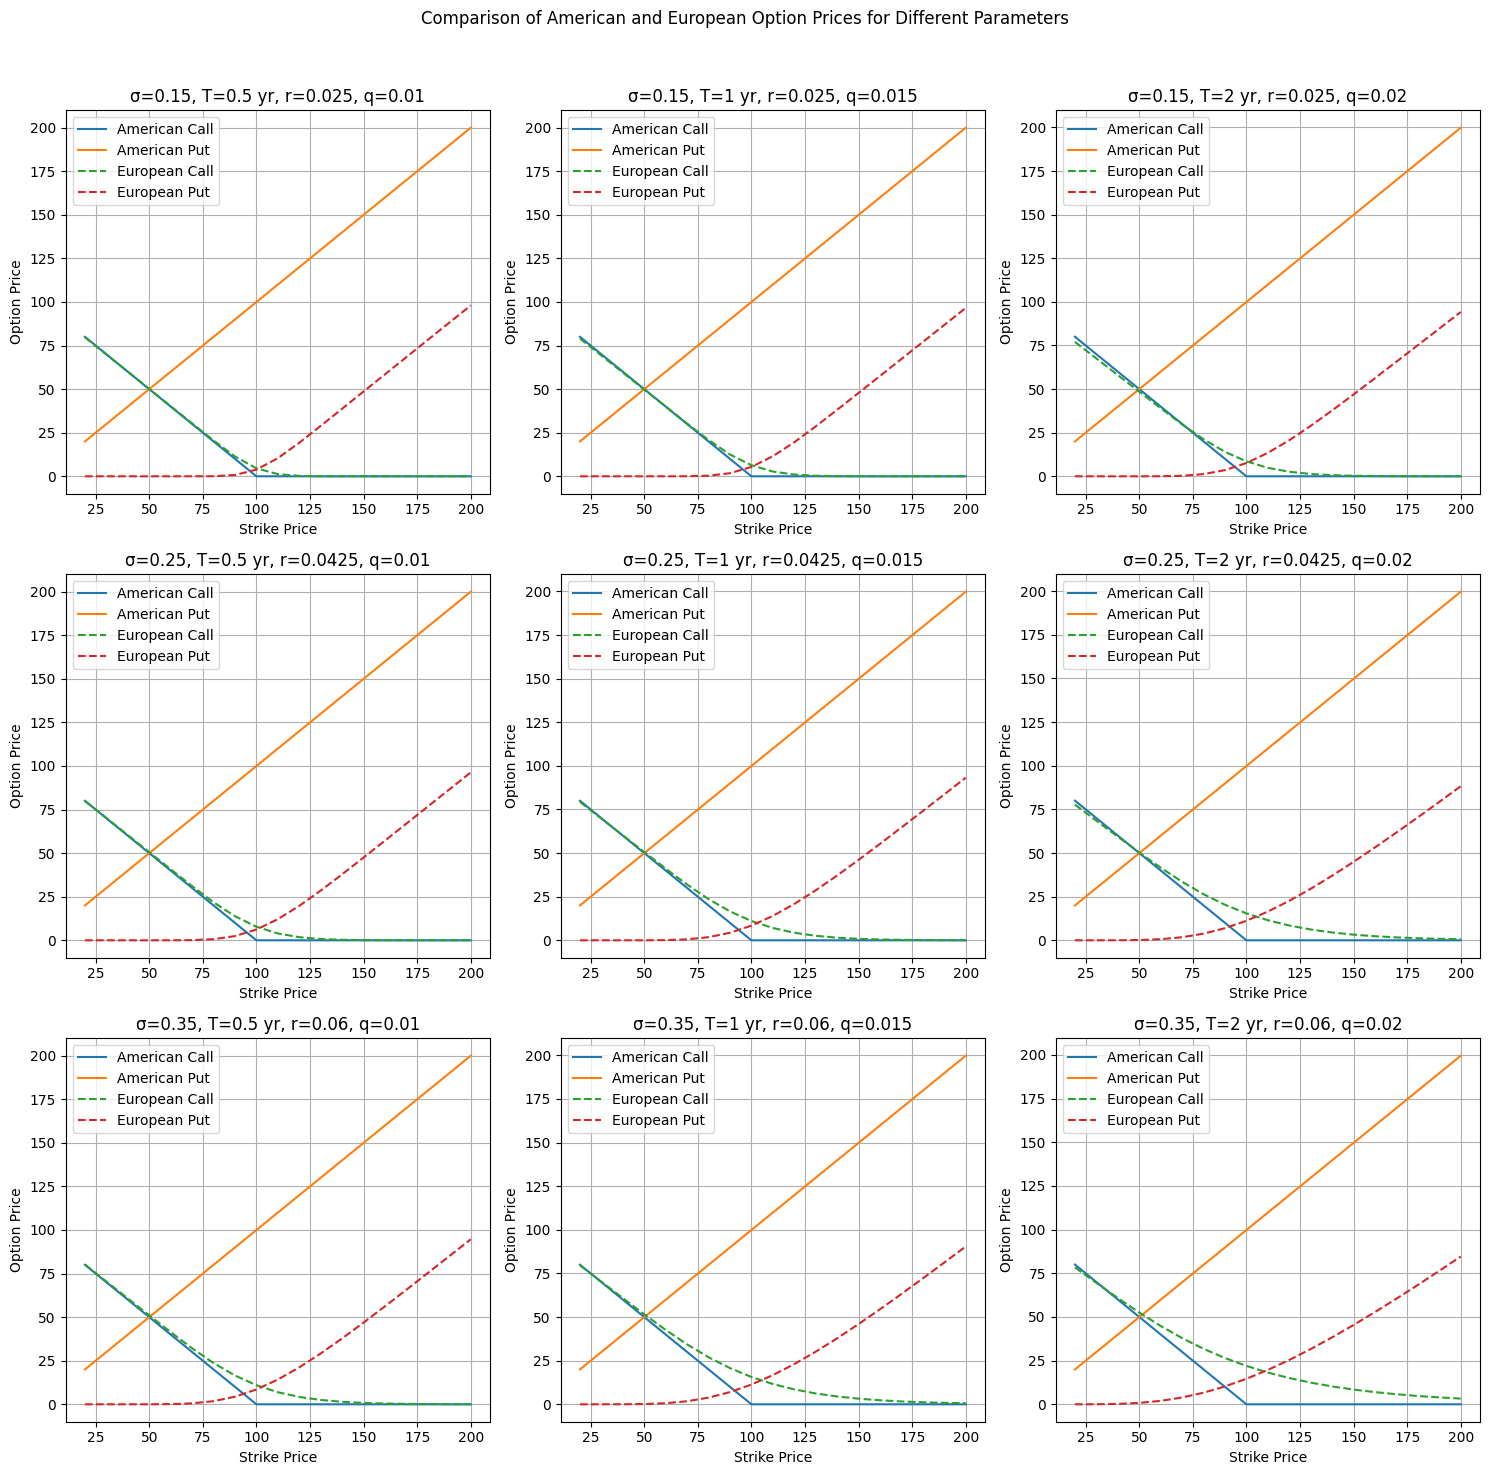

In [30]:
# Black-Scholes model for European option pricing
def european_option_price(S, K, r, q, sigma, T, option_type='call'):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        option_price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return option_price

# Binomial tree for American option pricing
def binomial_tree_american_option(S, K, r, q, sigma, T, N, option_type='call'):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp((r - q) * dt) - d) / (u - d)
    
    # Generate stock price tree
    stock_tree = np.zeros((N+1, N+1))
    stock_tree[0, 0] = S
    for i in range(1, N+1):
        stock_tree[i, 0] = stock_tree[i-1, 0] * u
        for j in range(1, i+1):
            stock_tree[i, j] = stock_tree[i-1, j-1] * d
            
    # Generate option value tree
    option_tree = np.zeros((N+1, N+1))
    if option_type == 'call':
        option_tree[:, N] = np.maximum(0, stock_tree[:, N] - K)
    elif option_type == 'put':
        option_tree[:, N] = np.maximum(0, K - stock_tree[:, N])
        
    # Calculate option values at each node
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            if option_type == 'call':
                option_tree[i, j] = max(stock_tree[i, j] - K,
                                        np.exp(-r * dt) * (p * option_tree[i, j+1] + (1 - p) * option_tree[i+1, j+1]))
            elif option_type == 'put':
                option_tree[i, j] = max(K - stock_tree[i, j],
                                        np.exp(-r * dt) * (p * option_tree[i, j+1] + (1 - p) * option_tree[i+1, j+1]))
    
    return option_tree[0, 0]

# Parameters
S = 100  # Current stock price
strike_range = np.arange(20, 201, 10)  # Strike range

# Different sets of parameters
volatilities = [0.15, 0.25, 0.35]
maturities = [0.5, 1, 2]
risk_free_rates = [0.025, 0.0425, 0.06]
dividend_yields = [0.01, 0.015, 0.02]
N = 100  # Number of time steps

# Plotting
fig, axes = plt.subplots(len(volatilities), len(maturities), figsize=(15, 15))
fig.suptitle('Comparison of American and European Option Prices for Different Parameters')

for i, sigma in enumerate(volatilities):
    for j, T in enumerate(maturities):
        r = risk_free_rates[i]
        q = dividend_yields[j]

        # Calculate option prices
        american_call_prices = [binomial_tree_american_option(S, K, r, q, sigma, T, N, 'call') for K in strike_range]
        american_put_prices = [binomial_tree_american_option(S, K, r, q, sigma, T, N, 'put') for K in strike_range]
        
        european_call_prices = [european_option_price(S, K, r, q, sigma, T, 'call') for K in strike_range]
        european_put_prices = [european_option_price(S, K, r, q, sigma, T, 'put') for K in strike_range]

        # Plot results
        ax = axes[i, j]
        ax.plot(strike_range, american_call_prices, label='American Call')
        ax.plot(strike_range, american_put_prices, label='American Put')
        ax.plot(strike_range, european_call_prices, linestyle='--', label='European Call')
        ax.plot(strike_range, european_put_prices, linestyle='--', label='European Put')
        ax.set_title(f'σ={sigma}, T={T} yr, r={r}, q={q}')
        ax.set_xlabel('Strike Price')
        ax.set_ylabel('Option Price')
        ax.legend()
        ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Q3) Implied Vol (50 pts)
<br> 1) Use Yahoo Finance to extract options prices (called option chain) for the S&P 500.
<br> You can use the Yahoo Finance Python API to do so.
<br> The data on a given date is for instance on: https://finance.yahoo.com/quote/%5ESPX/options
<br> Filter so as to keep the most liquid quotes and expiries.
<br> Plot the resulting implied volatility surface.
<br> 2) Repeat the same process for AAPL. What do you observe? Explain what is happening.
<br> How can you extract the forward value from these option data for a given expiry?

In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from datetime import datetime as dt
import pytz

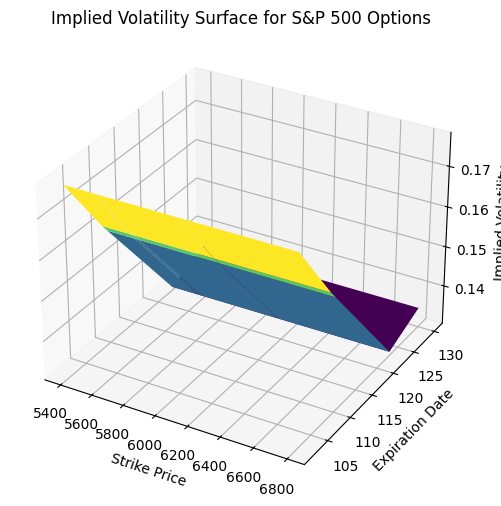

In [14]:
# Fetch options data for S&P 500 from Yahoo Finance
sp500 = yf.Ticker("^SPX")
options = sp500.option_chain('2024-12-20')  # Adjust the expiry date as needed

# Filter for the most liquid quotes
options = options.calls[options.calls.volume > 1000]  # Adjust volume threshold as needed

# Extract relevant information from the options data
strikes = options.strike
expirations = options.index.get_level_values(0).unique()  # Get unique expiration dates

# Create grid of strike prices and expirations
strikes_grid, expirations_grid = np.meshgrid(strikes, expirations, indexing='ij')

# Extract implied volatility data and reshape into a grid
implied_volatility_surface = np.zeros_like(strikes_grid, dtype=float)
for i, expiry in enumerate(expirations):
    implied_volatility_surface[:, i] = options.loc[expiry].impliedVolatility

# Plot the implied volatility surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(strikes_grid, expirations_grid, implied_volatility_surface, cmap='viridis')

# Set labels and title
ax.set_xlabel('Strike Price')
ax.set_ylabel('Expiration Date')
ax.set_zlabel('Implied Volatility')
ax.set_title('Implied Volatility Surface for S&P 500 Options')

# Show plot
plt.show()


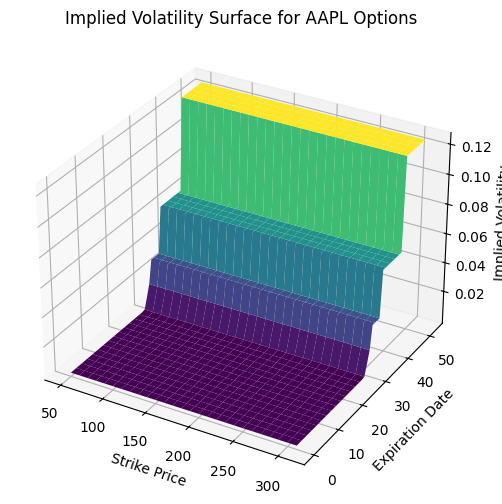

In [13]:
# Fetch options data for AAPL from Yahoo Finance
aapl = yf.Ticker("AAPL")
options = aapl.option_chain('2024-12-20')  # Adjust the expiry date from select expiry dates as needed

# Extract relevant information from the options data
strikes = options.calls.strike
expirations = options.calls.index.get_level_values(0).unique()  # Get unique expiration dates

# Create grid of strike prices and expirations
strikes_grid, expirations_grid = np.meshgrid(strikes, expirations, indexing='ij')

# Extract implied volatility data and reshape into a grid
implied_volatility_surface = np.zeros_like(strikes_grid, dtype=float)
for i, expiry in enumerate(expirations):
    implied_volatility_surface[:, i] = options.calls.loc[expiry].impliedVolatility

# Plot the implied volatility surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(strikes_grid, expirations_grid, implied_volatility_surface, cmap='viridis')

# Set labels and title
ax.set_xlabel('Strike Price')
ax.set_ylabel('Expiration Date')
ax.set_zlabel('Implied Volatility')
ax.set_title('Implied Volatility Surface for AAPL Options')

# Show plot
plt.show()


<br> The presence of a skew in the S&P500 grid indicates that implied volatility differs for options with different strike prices but the same expiration date. A skew occurs when implied volatility increases or decreases as strike prices move away from the at-the-money (ATM) level.
<br> Typically, in equity index options like the S&P 500, there is often a skew where out-of-the-money (OTM) put options have higher implied volatility than OTM call options. This skew is often attributed to the market's concern about downside risk and hedging demand for portfolio protection.
<br> <br> The waterfall-like structure in AAPL options implies a more complex pattern of implied volatility across strike prices and expiration dates.
This structure could indicate various factors affecting AAPL options, such as company-specific events, earnings announcements, product launches, or changes in market sentiment towards technology stocks. The shape of the waterfall structure thus might be influenced by the unique characteristics of AAPL as a company, its market position, and the broader technology sector.
<br> <br> The forward value can be extracted from option data using the put-call parity equation, i.e C-P = $e^{-rT}$(F-K). Note that the forward value represents the market's expectation of the future spot price at the option's expiration date.

Q1) FX Forwards (50 pts)
<br> We are interested in comparing the FX forward for the USD/EUR, EUR/JPY and USD/JPY pairs.
<br> For that purpose:
<br> a) Fetch an interest rate curve (discount factors or zero rates) from an online source
<br> b) Fetch the current value of each FX rate.
<br> c) Compare the value of the USD/JPY FX rate to the product of the USD/EUR and EUR/JPY rates. Comment.
<br> d) Compute the FX forward for each ccy pair.
<br> e) Compare the the USD/JPY forward to the product of the USD/EUR and EUR/JPY FX forwards. Comment

Initial Setup/Assumptions:
<br> 1) We take the first currency in the currency pair as the base currency and the second currency as the price currency.
<br> 2) The FX rates are downloaded using the yfinance library. I am writing this on the 15th of May so I will be writing the code to fetch rates for that particular day. The dates can be changed accordingly.
<br> 3) Interest rate curves were extremely difficult to fetch and hence 1Y maturity constant rates for currencies have been used here. 

In [27]:
# Interest rate values for USD, EUR, and JPY
usd_interest_rate = 0.053 #Per https://www.bloomberg.com/markets/rates-bonds/government-bonds/us
eur_interest_rate = 0.045 #Per https://www.investing.com/economic-calendar/interest-rate-decision-164
jpy_interest_rate = 0.01 #Per https://www.bloomberg.com/markets/rates-bonds/government-bonds/japan

# Step 2: Fetch current exchange rates
tickers = ['USDEUR=X', 'EURJPY=X', 'USDJPY=X']
exchange_rates = yf.download(tickers, start=start, end=end)

usd_eur_rate = exchange_rates['Close'].iloc[0]['USDEUR=X']
eur_jpy_rate = exchange_rates['Close'].iloc[0]['EURJPY=X']
usd_jpy_rate = exchange_rates['Close'].iloc[0]['USDJPY=X']

# Step 3: Compare the value of the USD/JPY FX rate to the product of the USD/EUR and EUR/JPY rates.Comment shared in below cell
print("USD/JPY Forex Rate:", usd_jpy_rate)
print("Product of the USD/EUR and EUR/JPY Forex Rates:", usd_eur_rate * eur_jpy_rate)

# Function to compute FX forward rate using interest rate parity
def compute_fx_forward(base_rate, price_rate, spot_rate):
    forward_rate = spot_rate * ((1+price_rate)/(1+base_rate)) #https://www.investopedia.com/terms/f/forwarddiscount.asp
    return forward_rate

# Step 4: Compute FX forward rates for each currency pair
usd_eur_forward = compute_fx_forward(usd_interest_rate, eur_interest_rate, usd_eur_rate)
eur_jpy_forward = compute_fx_forward(eur_interest_rate, jpy_interest_rate, eur_jpy_rate)
usd_jpy_forward = compute_fx_forward(usd_interest_rate, jpy_interest_rate, usd_jpy_rate)

# Step 5: Compare USD/JPY forward to the product of USD/EUR and EUR/JPY FX forwards. Comment shared in below cell
product_forward = usd_eur_forward * eur_jpy_forward

print("USD/EUR Forward Rate:", usd_eur_forward)
print("EUR/JPY Forward Rate:", eur_jpy_forward)
print("USD/JPY Forward Rate:", usd_jpy_forward)
print("Product of USD/EUR and EUR/JPY Forward Rates:", product_forward)

[*********************100%%**********************]  3 of 3 completed

USD/JPY Forex Rate: 155.8179931640625
Product of the USD/EUR and EUR/JPY Forex Rates: 155.81305384222105
USD/EUR Forward Rate: 0.9214161122739597
EUR/JPY Forward Rate: 162.19633622602984
USD/JPY Forward Rate: 149.4550551716079
Product of USD/EUR and EUR/JPY Forward Rates: 149.45031755046844


c) The difference of between the USD/JPY Rate and Product of the USD/EUR and EUR/JPY Rates is: 0.005 
<br> There does exist a "triangular arbitrage" opportunity in this case due to the cross rate of the EUR currency coming into the picture.
<br> If one follows this strategy then one can benefit from the arbitrage opportunity. 
<br> 1) Borrow USD and convert it into EUR using the USD/EUR rate.
<br> 2) Exchange EUR for JPY using the EUR/JPY rate.
<br> 3) Exchange JPY back to USD using the USD/JPY rate.
<br> It is however important to note that such opportunities are typically short-lived and quickly corrected by market participants

e) The difference of between the USD/JPY Rate and Product of the USD/EUR and EUR/JPY Rates is: 0.004745
<br> Note that we have already included the concept of the interest rate parity which is a fundamental concept in international finance that relates the interest rates and exchange rates between two countries. It states that the difference in interest rates between two countries should equal the difference in their forward exchange rates and hence this difference in forward rates attributes once again to a triangular arbitrage that can be applied.
<br> It can also be observed that the forward rates for all currency pairs are lesser than their spot rates. A forward forex rate lower than the current spot forex rates reflects expectations of depreciation of the base currency relative to the price currency, driven primarily by differences in interest rates.